In [1]:
import numpy as np
import torch
from em_train_spike_glm import em_train_spike_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"
Z_file = "spk_loc.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)
Z = np.load(base_dir+cell_type+"_"+experiment+"/data/"+Z_file).flatten()

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
C_den = torch.from_numpy(C_den)
Z = torch.from_numpy(Z)

In [3]:
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 50
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
batch_size = 100000
epoch_no = 15


In [ ]:
em_train_spike_glm(Z, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, epoch_no, C_den, C_syn_e, C_syn_i, 
                device, save_dir)

318
325


0 GOOD:  1 BAD:  22 ENC HID:  267545 DEC HID:  246644.0
1 GOOD:  0 BAD:  7 ENC HID:  233582 DEC HID:  238749.0
2 GOOD:  0 BAD:  13 ENC HID:  206361 DEC HID:  216976.0
3 GOOD:  0 BAD:  6 ENC HID:  183693 DEC HID:  197578.0
4 GOOD:  1 BAD:  1 ENC HID:  165656 DEC HID:  182859.0
5 GOOD:  0 BAD:  4 ENC HID:  150990 DEC HID:  166343.0
6 GOOD:  0 BAD:  2 ENC HID:  139117 DEC HID:  154876.0
7 GOOD:  0 BAD:  8 ENC HID:  128615 DEC HID:  143382.0
8 GOOD:  0 BAD:  7 ENC HID:  119499 DEC HID:  134232.0
9 GOOD:  0 BAD:  5 ENC HID:  111576 DEC HID:  124161.0
10 GOOD:  0 BAD:  3 ENC HID:  104539 DEC HID:  115262.0
11 GOOD:  1 BAD:  4 ENC HID:  98490 DEC HID:  108082.0
12 GOOD:  0 BAD:  3 ENC HID:  93108 DEC HID:  101910.0
13 GOOD:  0 BAD:  3 ENC HID:  88154 DEC HID:  97282.0
14 GOOD:  1 BAD:  1 ENC HID:  83683 DEC HID:  91096.0
15 GOOD:  0 BAD:  1 ENC HID:  79823 DEC HID:  87295.0
16 GOOD:  0 BAD:  3 ENC HID:  76232 DEC HID:  83091.0
17 GOOD:  0 BAD:  2 ENC HID:  72995 DEC HID:  79397.0
18 GOOD:  0 

148 GOOD:  9 BAD:  125 ENC HID:  33095 DEC HID:  33370.0
149 GOOD:  17 BAD:  261 ENC HID:  33036 DEC HID:  33717.0
150 GOOD:  5 BAD:  73 ENC HID:  33215 DEC HID:  34065.0
151 GOOD:  9 BAD:  150 ENC HID:  33477 DEC HID:  34094.0
152 GOOD:  8 BAD:  130 ENC HID:  33261 DEC HID:  34341.0
153 GOOD:  9 BAD:  118 ENC HID:  33833 DEC HID:  34817.0
154 GOOD:  6 BAD:  137 ENC HID:  33991 DEC HID:  34856.0
155 GOOD:  9 BAD:  124 ENC HID:  33610 DEC HID:  34327.0
156 GOOD:  4 BAD:  88 ENC HID:  33466 DEC HID:  34507.0
157 GOOD:  5 BAD:  75 ENC HID:  33815 DEC HID:  34851.0
158 GOOD:  7 BAD:  82 ENC HID:  33833 DEC HID:  34866.0
159 GOOD:  4 BAD:  62 ENC HID:  33818 DEC HID:  34567.0
160 GOOD:  10 BAD:  104 ENC HID:  33357 DEC HID:  34341.0
161 GOOD:  4 BAD:  49 ENC HID:  33613 DEC HID:  34909.0
162 GOOD:  2 BAD:  84 ENC HID:  33614 DEC HID:  34764.0
163 GOOD:  2 BAD:  64 ENC HID:  33317 DEC HID:  34879.0
164 GOOD:  8 BAD:  155 ENC HID:  33547 DEC HID:  34833.0
165 GOOD:  8 BAD:  80 ENC HID:  33759

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_output.npz")

In [6]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

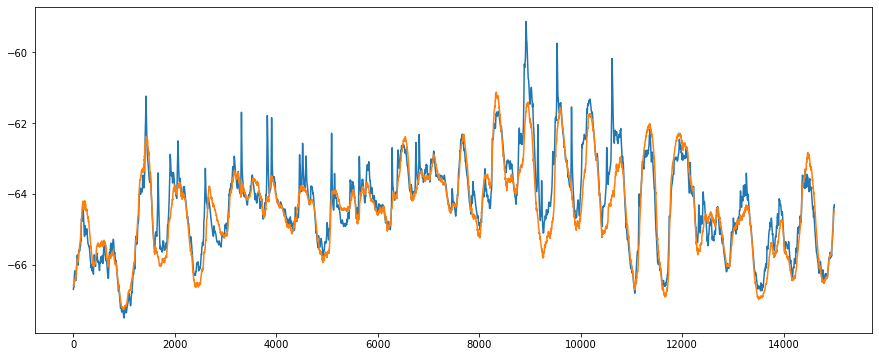

In [7]:
plt.figure(figsize = (15,6))
plt.plot(V[400000:450000][15000:30000])
plt.plot(test[15000:30000])

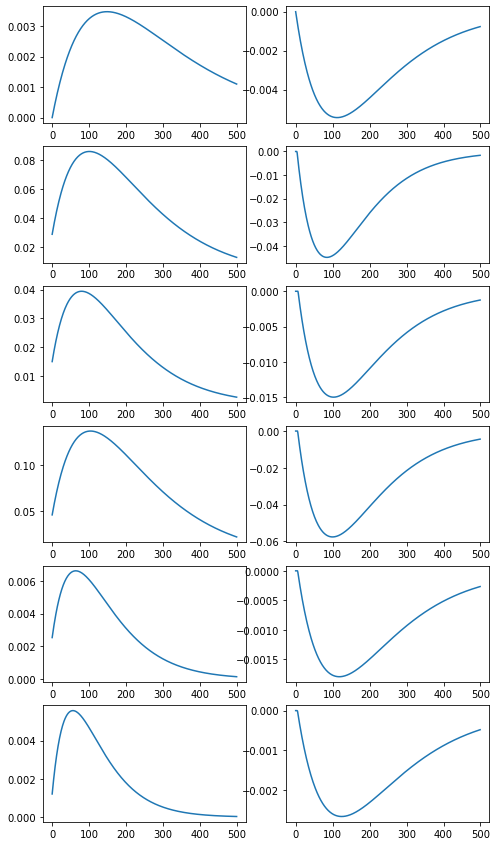

In [8]:
sub_no = 6

fig, axs = plt.subplots(nrows=sub_no, ncols=2, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    #axs[i,2].plot(filters[sub_no*2+i])